# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd

%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv('licfile.csv', names=['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1','BIZLINE2','BIZCITYSTATE',
'BIZTELEPHONE','EXPIRATION','OWNER','MAILLINE1','MAILLINE2','MAILCITYSTATE','MAILCOUNTYCODE',
'MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG'])
df.head()

/Users/leiao/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
df.to_csv("lic_named.csv", index=False)

# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df = pd.read_csv('lic_named.csv', dtype={'LICNUMBER': str, 'MAILCOUNTYCODE': str,'MAILZIP': str,'EXPIRATION': str, 'TELEPHONE': str })

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [5]:
# df[['LICNUMBER','LICNUMBER', 'MAILCOUNTYCODE','MAILZIP','TELEPHONE']] = df[['LICNUMBER','LICNUMBER', 'MAILCOUNTYCODE','MAILZIP','TELEPHONE']].astype(str)

In [6]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [7]:
df['EXPIRATION'] = df.EXPIRATION.str[-4:] + df.EXPIRATION.str[:-4]

Check the first five expirations to make sure they look right.

In [8]:
# df['EXPIRATION'] = pd.to_datetime(df.EXPIRATION, format='%Y-%-m-%d')  

In [9]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017810,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,20171229,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017926,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,20171104,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018225,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [10]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [11]:
df.LICTYPE.value_counts().tail(10)

Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Booting CE Provider                                3
Mobile Cosmetology Manicure Specialty Saloon       2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Cosmetology Wig Instructor                         2
Licensed Court Interpreter CE Provider             2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [12]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician",na=False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017527,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,395.0,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,20171021,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,29.0,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017528,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,201.0,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016618,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,449.0,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,20161026,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,449.0,TITUS,75558,9039462547,AE,N
47030,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,20161021,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,201.0,HARRIS,77087,8325285241,AE,N
47031,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,20171214,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,453.0,TRAVIS,78753,7372474738,AE,N
47032,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,2017603,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,67.0,CASS,75656,9036392017,AE,N
47033,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,2017611,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,201.0,HARRIS,77021,7134406945,AE,N
47034,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,20171117,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,167.0,GALVESTON,77568,4095390843,AE,N


## 8. How many of the rows of LICTYPE are NaN?

In [13]:
df.LICTYPE.isnull().sum()

7086

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [14]:
electrician = df[df['LICTYPE'].str.contains("Electrician").fillna(False)]

In [15]:
electrician

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017527,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,395.0,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,20171021,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,29.0,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017528,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,201.0,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016618,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,449.0,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,20161026,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,449.0,TITUS,75558,9039462547,AE,N
47030,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,20161021,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,201.0,HARRIS,77087,8325285241,AE,N
47031,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,20171214,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,453.0,TRAVIS,78753,7372474738,AE,N
47032,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,2017603,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,67.0,CASS,75656,9036392017,AE,N
47033,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,2017611,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,201.0,HARRIS,77021,7134406945,AE,N
47034,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,20171117,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,167.0,GALVESTON,77568,4095390843,AE,N


## 10. What's the most popular kind of electrician?

In [16]:
electrician.LICTYPE.value_counts().head()

Apprentice Electrician         110593
Journeyman Electrician          38170
Master Electrician              16810
Apprentice Sign Electrician      3994
Maintenance Electrician          1184
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

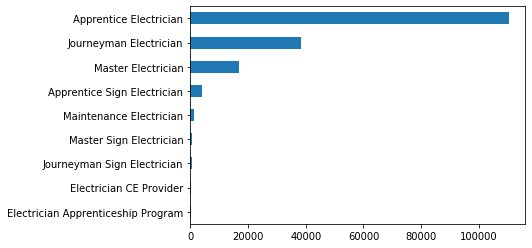

In [17]:
electrician.LICTYPE.value_counts().sort_values().plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [18]:
electrician[electrician.LICTYPE.str.contains('Sign')].LICNUMBER.count()

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [19]:
df.OWNER.str.extract('^(.*),', expand=False)

0            RISINGER
1            WILLIAMS
2             GUEVARA
3              BOWERS
4              DEMSKY
5            THOMPSON
6              TUCKER
7              COOPER
8         BLANKENSHIP
9               DAWES
10             LESTER
11            MANCILL
12         HUDDLESTON
13             JORDAN
14              IRWIN
15               HALL
16              JAMES
17             SIDAWI
18              SMITH
19           FERGUSON
20           MCKINLEY
21             SOWELL
22             SEVIER
23         SOMERVILLE
24           BARCLIFT
25               FORD
26            SCHAFER
27           MARTINEZ
28            CLEMANS
29           MARTINEZ
             ...     
597786        SNUFFER
597787       MARTINEZ
597788         YOSTEN
597789          CLICK
597790          PENSE
597791           LARA
597792          SMITH
597793      BINNICKER
597794         CHAVEZ
597795       GUERRERO
597796         SAVAGE
597797          ADAMS
597798          SCOTT
597799           HILL
597800    

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [20]:
df['LASTNAME'] = df.OWNER.str.extract('^(.*),', expand=False)

In [21]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
LASTNAME           object
dtype: object

# 15. What are the ten most popular last names?

In [22]:
df.LASTNAME.value_counts().head(10)

NGUYEN       22283
TRAN          8135
LE            5605
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4625
HERNANDEZ     4389
PHAM          3996
GONZALEZ      3634
SMITH         3208
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [23]:
df[df['LASTNAME'] == 'NGUYEN'].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             12855
Cosmetology Operator                4039
Cosmetology Esthetician             2881
Cosmetologist                       1874
Apprentice Electrician               195
A/C Technician                       169
Journeyman Electrician                55
Cosmetology Operator Instructor       48
Barber Manicurist                     25
Master Electrician                    25
Name: LICTYPE, dtype: int64

In [24]:
df[df['LASTNAME'] == 'TRAN'].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             4674
Cosmetology Operator               1474
Cosmetology Esthetician            1032
Cosmetologist                       712
Apprentice Electrician               95
A/C Technician                       69
Journeyman Electrician               16
Cosmetology Operator Instructor      10
Barber Manicurist                     9
Barber, Class A                       7
Name: LICTYPE, dtype: int64

In [25]:
df[df['LASTNAME'] == 'LE'].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             3276
Cosmetology Operator                953
Cosmetology Esthetician             730
Cosmetologist                       497
A/C Technician                       43
Apprentice Electrician               37
Journeyman Electrician               20
Cosmetology Operator Instructor      12
Barber, Class A                       7
Master Electrician                    6
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [26]:
df[df['LASTNAME'].isin(['NGUYEN','TRAN','LE'])].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             20805
Cosmetology Operator                6466
Cosmetology Esthetician             4643
Cosmetologist                       3083
Apprentice Electrician               327
A/C Technician                       281
Journeyman Electrician                91
Cosmetology Operator Instructor       70
Barber Manicurist                     37
Master Electrician                    36
Name: LICTYPE, dtype: int64


## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [27]:
df[df['LASTNAME'] == 'GARCIA'].LICTYPE.value_counts().head(10)

Apprentice Electrician                      1952
Cosmetology Operator                        1672
Journeyman Electrician                       493
A/C Technician                               333
Barber, Class A                              186
Master Electrician                           118
Tow Truck Operator (Incident Management)      94
Cosmetology Esthetician                       88
Apprentice Sign Electrician                   87
Tow Truck Operator (Consent Tow)              78
Name: LICTYPE, dtype: int64

In [28]:
df[df['LASTNAME'] == 'RODRIGUEZ'].LICTYPE.value_counts().head(10)

Apprentice Electrician                      1573
Cosmetology Operator                        1390
Journeyman Electrician                       386
A/C Technician                               320
Barber, Class A                              138
Cosmetology Esthetician                       91
Master Electrician                            83
Tow Truck Operator (Incident Management)      80
Tow Truck Operator (Consent Tow)              69
Cosmetology Manicurist                        60
Name: LICTYPE, dtype: int64

In [29]:
df[df['LASTNAME'] == 'MARTINEZ'].LICTYPE.value_counts().head(10) 

Apprentice Electrician                      1618
Cosmetology Operator                        1388
Journeyman Electrician                       387
A/C Technician                               317
Barber, Class A                              149
Master Electrician                            92
Cosmetology Esthetician                       86
Tow Truck Operator (Incident Management)      70
Cosmetology Manicurist                        63
Used Auto Parts Recycler Employee             62
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [30]:
df[df.LASTNAME.str.contains('.*EZ$', na=False)].LICTYPE.value_counts().head()

Apprentice Electrician    16065
Cosmetology Operator      13885
Journeyman Electrician     3529
A/C Technician             2889
Barber, Class A            1277
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [31]:
df[df.LASTNAME.str.contains('.*EZ$', na=False)].LICTYPE.value_counts(normalize=True).head()

Apprentice Electrician    0.361816
Cosmetology Operator      0.312718
Journeyman Electrician    0.079480
A/C Technician            0.065066
Barber, Class A           0.028761
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [32]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [33]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [34]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [35]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [36]:
df.OWNER.str.extract(', (.*) ', expand=False).head(10)

0              JIM
1              JON
2             JUAN
3    JAMES BRISCOE
4             JOHN
5            RANDY
6            MONTE
7           THOMAS
8            KERRY
9         NICHOLAS
Name: OWNER, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [37]:
df['FIRSTNAME'] = df.OWNER.str.extract(', (.*) ', expand=False)
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017810,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,20171229,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017926,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,20171104,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES BRISCOE
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018225,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [38]:
df.FIRSTNAME.isnull().sum()

212305

What do their names look like?

In [39]:
df[df.FIRSTNAME.isnull()].OWNER

29           MARTINEZ, ARTURO
63         VANGINAULT, FREDDY
64         VANSICKLE, MICHAEL
73             COFFMAN, ERICK
76              HUNTER, SCOTT
77              WATTS, EDWARD
87             SERRATO, ZENON
92              ASHLEY, WAYNE
96          MARSLAND, RICHARD
109           RICHARD, MEDINA
119              LUCIO, JAIME
120         ESCAMILLA, ROBERT
136            ARCIGA, HECTOR
139         ROBINSON, RICHARD
140                BELL, JANA
141               BETHKE, MAX
150             SIBLEY, SHAWN
151            REYES, OCTAVIO
158        BAKER, CHRISTOPHER
159               CLARK, JOSH
161            NIETO, ARNULFO
163            EDWARDS, BRIAN
166            FLORES, ISIDRO
169          HALKARD, KENNETH
175       ESPINOSA, NATIVIDAD
177           PADILLA, ERASTO
182                ADAM, ARCE
185       HERNANDEZ, JONATHAN
188           SEELING, NORMAN
191            STEVENS, CHUCK
                 ...         
597406          LATZEL, DEREK
597409          TORREZ, SELSO
597417    

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [40]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df.OWNER.str.extract(', (.*)$', expand=False)

How many empty first names do we have now?

In [41]:
df.FIRSTNAME.isnull().sum()

82099

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [42]:
df.FIRSTNAME.value_counts().head()

JOSE       6462
MICHAEL    5447
DAVID      4960
MARIA      4647
JAMES      4217
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [43]:
df[df.LICTYPE.str.contains('Cosmetolog.*').fillna(False)].FIRSTNAME.dropna().head()

181761        LLC
192112     LILLIE
192113     TERESA
192114    MILDRED
192115      BETTY
Name: FIRSTNAME, dtype: object

## 27. Most popular first names for anything involving electricity?

In [44]:
df[df.LICTYPE.str.contains('[Ee]lectric.*').fillna(False)].FIRSTNAME.dropna().head()

47025     MARION
47026    FELIX G
47027     RUFINO
47028     MARCUS
47029      DAVID
Name: FIRSTNAME, dtype: object

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [45]:
!pip install gender-guesser

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Test to see that it works

In [46]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [47]:
detector.get_gender('Jose')

'male'

In [48]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [49]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0       male
1       male
2       male
3    unknown
4       male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [50]:
df['GENDER'] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))

In [51]:
df.GENDER.value_counts()

male             208826
unknown          169859
female           145492
mostly_female     33024
mostly_male       24038
andy              16577
Name: GENDER, dtype: int64

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [52]:
df['GENDER'] = df.GENDER.replace({
    "mostly_male": "male",
    "mostly-female": "female"
})



In [53]:
import numpy as np
df['GENDER'] = df.GENDER.replace(["andy", "unknown"], np.nan)

In [54]:
df.GENDER.value_counts()

male             232864
female           145492
mostly_female     33024
Name: GENDER, dtype: int64

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [55]:
df.GENDER.value_counts(normalize=True, dropna=False)

male             0.389525
NaN              0.311862
female           0.243373
mostly_female    0.055241
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [56]:
df[df.GENDER.isnull()].FIRSTNAME.value_counts().head()

THANH    985
DUNG     807
TRANG    771
INC      715
LINH     667
Name: FIRSTNAME, dtype: int64

## 31. What are the most popular licenses for men? For women?

In [57]:
df[df.GENDER=='male'].LICTYPE.value_counts().head(10)

Apprentice Electrician                      86648
Journeyman Electrician                      32258
A/C Technician                              22538
Master Electrician                          14302
Cosmetology Operator                        12945
Cosmetology Manicurist                       9528
Barber, Class A                              9236
Tow Truck Operator (Incident Management)     6169
Tow Truck Operator (Consent Tow)             5234
Legal Service Contract Sales Rep             5110
Name: LICTYPE, dtype: int64

In [58]:
df[df.GENDER=='female'].LICTYPE.value_counts().head(10)

Cosmetology Operator                98892
Cosmetology Esthetician             11689
Cosmetology Manicurist               8967
Legal Service Contract Sales Rep     3985
Cosmetology Operator Instructor      3960
Apprentice Electrician               3627
Barber, Class A                      3608
Cosmetologist                        1710
VSF Employee                         1555
Property Tax Appraiser               1021
Name: LICTYPE, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [59]:
df[df.LICTYPE=='Property Tax Appraiser'].GENDER.value_counts(normalize=True)

male             0.542366
female           0.398672
mostly_female    0.058961
Name: GENDER, dtype: float64

In [60]:
df[df.LICTYPE.str.contains('[Tt]ruck').fillna(False)].GENDER.value_counts(normalize=True)

male             0.949789
female           0.037638
mostly_female    0.012573
Name: GENDER, dtype: float64

(By the way, what are those tow truck jobs?)

In [61]:
df[df.LICTYPE.str.contains('[Tt]ruck').fillna(False)].LICTYPE.value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Tow Truck Operator (Private Property)        352
Tow Truck Operator Trainee                    53
Name: LICTYPE, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

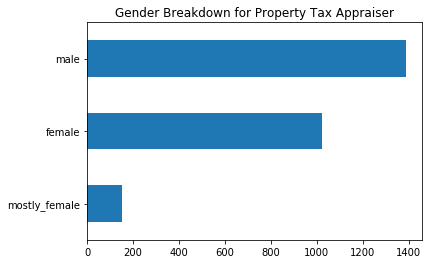

In [62]:
df[df.LICTYPE=='Property Tax Appraiser'].GENDER.value_counts().sort_values().plot(title='Gender Breakdown for Property Tax Appraiser',kind='barh')

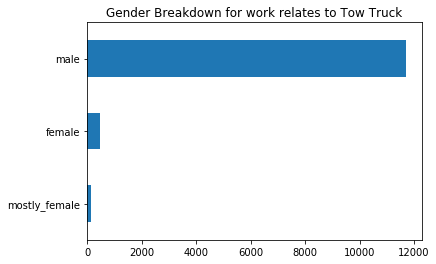

In [63]:
df[df.LICTYPE.str.contains('[Tt]ruck').fillna(False)].GENDER.value_counts().sort_values().plot(title="Gender Breakdown for work relates to Tow Truck", kind='barh')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [64]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    86648
Journeyman Electrician    32258
A/C Technician            22538
Master Electrician        14302
Cosmetology Operator      12945
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [65]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

/Users/leiao/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,LICTYPE,LICTYPE,LICTYPE
A/C CE Provider,NaN,NaN,56.0
A/C Contractor,NaN,NaN,16376.0
A/C Technician,22538.0,479.0,4580.0
Appliance Installation Contractor,NaN,NaN,668.0
Appliance Installer,1636.0,33.0,263.0


In [66]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,A/C CE Provider,NaN,NaN,56.0
1,A/C Contractor,NaN,NaN,16376.0
2,A/C Technician,22538.0,479.0,4580.0
3,Appliance Installation Contractor,NaN,NaN,668.0
4,Appliance Installer,1636.0,33.0,263.0


In [67]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,A/C CE Provider,0.0,0.0,56.0
1,A/C Contractor,0.0,0.0,16376.0
2,A/C Technician,22538.0,479.0,4580.0
3,Appliance Installation Contractor,0.0,0.0,668.0
4,Appliance Installer,1636.0,33.0,263.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [68]:
gender_df['total'] = gender_df.male + gender_df.female + gender_df.unknown

In [69]:
gender_df['percent-known'] = 100 * (gender_df.male + gender_df.female) / gender_df.total

In [70]:
gender_df['percent-male'] = 100 * gender_df.male / (gender_df.male + gender_df.female)

In [71]:
gender_df['percent-female'] = 100 * gender_df.female / (gender_df.male + gender_df.female)

In [72]:
gender_df.fillna(0, inplace=True)

In [73]:
gender_df.head()

,license,male,female,unknown,total,percent-known,percent-male,percent-female
0,A/C CE Provider,0.0,0.0,56.0,56.0,0.000000,0.000000,0.000000
1,A/C Contractor,0.0,0.0,16376.0,16376.0,0.000000,0.000000,0.000000
2,A/C Technician,22538.0,479.0,4580.0,27597.0,83.403993,97.918929,2.081071
3,Appliance Installation Contractor,0.0,0.0,668.0,668.0,0.000000,0.000000,0.000000
4,Appliance Installer,1636.0,33.0,263.0,1932.0,86.387164,98.022768,1.977232


## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

In [74]:
gender_df[(gender_df.total > 2000) & (gender_df['percent-known'] > 75)].sort_values(by='male',ascending=False).head(10)

,license,male,female,unknown,total,percent-known,percent-male,percent-female
5,Apprentice Electrician,86648.0,3627.0,19320.0,109595.0,82.371459,95.982276,4.017724
60,Journeyman Electrician,32258.0,548.0,4929.0,37735.0,86.937856,98.329574,1.670426
2,A/C Technician,22538.0,479.0,4580.0,27597.0,83.403993,97.918929,2.081071
68,Master Electrician,14302.0,179.0,2134.0,16615.0,87.156184,98.763898,1.236102
41,Cosmetology Operator,12945.0,98892.0,26688.0,138525.0,80.734164,11.574881,88.425119
21,"Barber, Class A",9236.0,3608.0,2747.0,15591.0,82.380861,71.909063,28.090937
94,Tow Truck Operator (Incident Management),6169.0,243.0,1304.0,7716.0,83.100052,96.210231,3.789769
93,Tow Truck Operator (Consent Tow),5234.0,207.0,1201.0,6642.0,81.918097,96.195552,3.804448
64,Legal Service Contract Sales Rep,5110.0,3985.0,1929.0,11024.0,82.501814,56.184717,43.815283
52,Dual Towing Operator(IM)/VSF Employee,3294.0,191.0,615.0,4100.0,85.000000,94.519369,5.480631


In [75]:
male_df = gender_df[(gender_df.total > 2000) & (gender_df['percent-known'] > 75)].sort_values(by='male',ascending=False).head(10)

In [76]:
gender_df[(gender_df.total > 2000) & (gender_df['percent-known'] > 75)].sort_values(by='female',ascending=False).head(10)

,license,male,female,unknown,total,percent-known,percent-male,percent-female
41,Cosmetology Operator,12945.0,98892.0,26688.0,138525.0,80.734164,11.574881,88.425119
64,Legal Service Contract Sales Rep,5110.0,3985.0,1929.0,11024.0,82.501814,56.184717,43.815283
42,Cosmetology Operator Instructor,524.0,3960.0,895.0,5379.0,83.361220,11.685995,88.314005
5,Apprentice Electrician,86648.0,3627.0,19320.0,109595.0,82.371459,95.982276,4.017724
21,"Barber, Class A",9236.0,3608.0,2747.0,15591.0,82.380861,71.909063,28.090937
99,VSF Employee,1280.0,1555.0,459.0,3294.0,86.065574,45.149912,54.850088
79,Property Tax Appraiser,1389.0,1021.0,285.0,2695.0,89.424861,57.634855,42.365145
60,Journeyman Electrician,32258.0,548.0,4929.0,37735.0,86.937856,98.329574,1.670426
2,A/C Technician,22538.0,479.0,4580.0,27597.0,83.403993,97.918929,2.081071
98,Used Auto Parts Recycler Employee,1709.0,387.0,370.0,2466.0,84.995945,81.536260,18.463740


In [77]:
female_df = gender_df[(gender_df.total > 2000) & (gender_df['percent-known'] > 75)].sort_values(by='female',ascending=False).head(10)

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [100]:
merged_male = df.merge(male_df, left_on='LICTYPE', right_on='license')
merged_male = merged_male.dropna(subset=['TELEPHONE'])

In [112]:
male_series = [
    merged_male['LICTYPE'],
    merged_male['OWNER'],
    merged_male['TELEPHONE']
]
malephone_df = pd.concat(male_series, axis=1)

In [114]:
malephone_df.head()

,LICTYPE,OWNER,TELEPHONE
27959,Apprentice Electrician,"BOLTON, MARION N",9798284713
27960,Apprentice Electrician,"GONZALEZ, FELIX G JR",2104887491
27961,Apprentice Electrician,"HERNANDEZ, RUFINO",7133824802
27962,Apprentice Electrician,"COPELAND, MARCUS A",9035634950
27963,Apprentice Electrician,"ANGLIN, DAVID LEE",9039462547


In [116]:
merged_female = df.merge(female_df, left_on='LICTYPE', right_on='license')
merged_female = merged_female.dropna(subset=['TELEPHONE'])
female_series = [
    merged_female['LICTYPE'],
    merged_female['OWNER'],
    merged_female['TELEPHONE']
]
femalephone_df = pd.concat(female_series, axis=1)
femalephone_df.head()

,LICTYPE,OWNER,TELEPHONE
27959,Apprentice Electrician,"BOLTON, MARION N",9798284713
27960,Apprentice Electrician,"GONZALEZ, FELIX G JR",2104887491
27961,Apprentice Electrician,"HERNANDEZ, RUFINO",7133824802
27962,Apprentice Electrician,"COPELAND, MARCUS A",9035634950
27963,Apprentice Electrician,"ANGLIN, DAVID LEE",9039462547


## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [81]:
violations_df = pd.read_csv('violations.csv')
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


In [82]:
violations_df.shape

(115, 9)

In [83]:
violations_df.dtypes

basis          object
city           object
complaintno    object
county         object
licenseno      object
name           object
order          object
orderDate      object
zipcode         int64
dtype: object

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [118]:
merged_violation = df.merge(violations_df, left_on='LICNUMBER', right_on = 'licenseno')

In [123]:
merged_violation.shape # have added FIRSTNAME LASTNAME GENDER columns to the original dataset

(90, 31)

## 39. Find each violation involving a failure with records. Use a regular expression.

In [131]:
violations_df[violations_df.basis.str.contains('fail.* record.*')]

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346
10,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099
12,Respondent failed to dispose of single use ite...,HOUSTON,COS20160022958,HARRIS,711110,"NGUYEN, DUC THI",Respondent is assessed an administrative penal...,10/3/2016,77084
16,Respondent failed to keep a record of the date...,HOUSTON,COS20160023083,HARRIS,743934,"NGUYEN, CHANH V",Respondent is assessed an administrative penal...,8/29/2016,77088
19,Respondent failed to keep a record of the date...,SPRING,COS20160021148,HARRIS,748989,"NGUYEN, TRUONG V",Respondent is assessed an administrative penal...,8/24/2016,77388


## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [150]:
pd.set_option('max_colwidth', 800)

In [157]:
violations_df[violations_df.order.str.contains('penalt.*', na=False)]['order'].str.extract('(\$\d*)', expand=False)

0      $300
1      $500
2        $1
3      $375
5        $1
6        $1
7      $750
8      $750
9      $750
10     $925
11     $575
12       $1
13     $550
14     $500
15     $750
16       $1
17     $500
18     $500
19       $1
20     $375
21     $500
22     $500
23     $750
24     $500
25     $750
26       $1
27     $750
28       $1
29     $400
30     $500
       ... 
85     $875
86     $500
87     $500
88     $750
89     $500
90       $1
91     $500
92       $1
93       $2
94     $575
95     $875
96     $750
97     $750
98     $750
99     $750
100      $1
101    $375
102    $250
103      $3
104    $225
105    $750
106    $875
107    $750
108    $625
109      $1
110    $575
111    $500
112      $1
113    $150
114      $1
Name: order, Length: 112, dtype: object

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [172]:
violations_df['fine'] = violations_df[violations_df.order.str.contains('penalt.*', na=False)]['order'].str.extract('\$(\d*)', expand=False)

In [177]:
violations_df['fine'].astype(float)

0      300.0
1      500.0
2        1.0
3      375.0
4        NaN
5        1.0
6        1.0
7      750.0
8      750.0
9      750.0
10     925.0
11     575.0
12       1.0
13     550.0
14     500.0
15     750.0
16       1.0
17     500.0
18     500.0
19       1.0
20     375.0
21     500.0
22     500.0
23     750.0
24     500.0
25     750.0
26       1.0
27     750.0
28       1.0
29     400.0
       ...  
85     875.0
86     500.0
87     500.0
88     750.0
89     500.0
90       1.0
91     500.0
92       1.0
93       2.0
94     575.0
95     875.0
96     750.0
97     750.0
98     750.0
99     750.0
100      1.0
101    375.0
102    250.0
103      3.0
104    225.0
105    750.0
106    875.0
107    750.0
108    625.0
109      1.0
110    575.0
111    500.0
112      1.0
113    150.0
114      1.0
Name: fine, Length: 115, dtype: float64

## 42. Which orders results in the top fines?

In [178]:
violations_df.sort_values(by='fine',ascending=False).order.head(10)

48     Respondent is assessed an administrative penalty in the amount of $975.
10     Respondent is assessed an administrative penalty in the amount of $925.
95     Respondent is assessed an administrative penalty in the amount of $875.
85     Respondent is assessed an administrative penalty in the amount of $875.
106    Respondent is assessed an administrative penalty in the amount of $875.
41     Respondent is assessed an administrative penalty in the amount of $850.
59     Respondent is assessed an administrative penalty in the amount of $750.
43     Respondent is assessed an administrative penalty in the amount of $750.
99     Respondent is assessed an administrative penalty in the amount of $750.
98     Respondent is assessed an administrative penalty in the amount of $750.
Name: order, dtype: object

## 43. Are you still here???

I'm sure impressed.